In [1]:
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/egorhowell/Youtube/main/Time-Series-Crash-Course/AirPassengers.csv',index_col=0)
data.index=pd.to_datetime(data.index)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [3]:
train = data.iloc[:int(len(data) * 0.8)]
test = data.iloc[int(len(data) * 0.8):]

In [12]:
def plot_func(forecast1,
              forecast2,
              title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['#Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast1, name='Simple'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast2, name='Holt'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()


In [13]:
model_simple = SimpleExpSmoothing(train['#Passengers']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))


C:\Users\VIJAY ISRANI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [20]:
model_holt = Holt(train['#Passengers'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))

C:\Users\VIJAY ISRANI\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



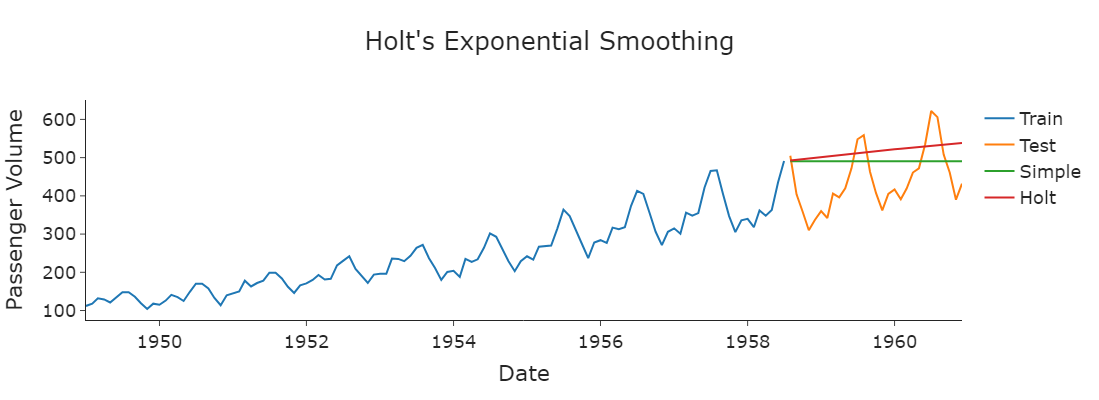

In [21]:
plot_func(forecasts_simple, forecasts_holt, "Holt's Exponential Smoothing")